# Essential Purpose
Simple sentiment analysis: using Keras implementation of recurrent neural networks (RNNs) to predict the sentiment for different IMDB reviews.

## Requirements
In this mission, you will use an RNN-based classifier to predict the sentiment of an IMDB movie reviews dataset.
Write code that uses the Keras library to build, train, and test an RNN with the architecture described.
Submission of your project on GitHub is optional. If you choose to manage your project using GitHub, find guidelines for using GitHub here. Ensure you are coding using your Jupyter Notebook – it will be uploaded to GitHub when you perform a Git push operation.

You are expected to write around 25 lines of code to complete this project.


In [1]:
# read the dataset 

from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz", maxlen=130, num_words=6000)   

In [2]:
# padding the sequence
from keras.preprocessing import sequence

x_train = sequence.pad_sequences(x_train, maxlen=130)    

In [3]:
import numpy as np

np_load_old = np.load

np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

#from keras.datasets import imdb

#(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz", maxlen=130, num_words=6000)

from keras.preprocessing import sequence

x_train = sequence.pad_sequences(x_train, maxlen=130)

np.load = np_load_old

In [15]:
np.shape(y_train)

(6169,)

## Define an RNN with the following layers:
An embedding layer with the following parameters:

The input dimension is 6000.

The output dimension is 128.

The input length is 130.

An LSTM layer with 32 units.

A fully connected layer with the following parameters:

Activation function is ReLU.

The number of units is 20.

A dropout layer with a dropout rate of 5%.

A fully connected layer with the following parameters:

Activation function is sigmoid.

The number of units is 1.

In [4]:
from tensorflow.keras.models import Sequential
model = Sequential()

from tensorflow.keras.layers import Embedding
model.add(Embedding(input_length=130, input_dim=6000, output_dim=128))

from tensorflow.keras.layers import LSTM
model.add(LSTM(32))

from tensorflow.keras.layers import Dense
model.add(Dense(units=20, activation='relu'))

from tensorflow.keras.layers import Dropout
model.add(Dropout(0.05))

model.add(Dense(units=1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 128)          768000    
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 20)                660       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 789,289
Trainable params: 789,289
Non-trainable params: 0
_________________________________________________________________


## Choosing Hyperparameters
Build the network using the following parameters:

Optimizer: Adam

Loss function: binary_crossentropy

Metrics: accuracy

Epochs: 5

Batch size: 100

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, batch_size=100, epochs=5)

Epoch 1/5
62/62 [==============================] - 11s 123ms/step - loss: 0.6044 - accuracy: 0.6836
Epoch 2/5
62/62 [==============================] - 7s 119ms/step - loss: 0.2787 - accuracy: 0.8911
Epoch 3/5
62/62 [==============================] - 8s 129ms/step - loss: 0.1553 - accuracy: 0.9481
Epoch 4/5
62/62 [==============================] - 8s 126ms/step - loss: 0.0936 - accuracy: 0.9705
Epoch 5/5
62/62 [==============================] - 8s 122ms/step - loss: 0.0656 - accuracy: 0.9809


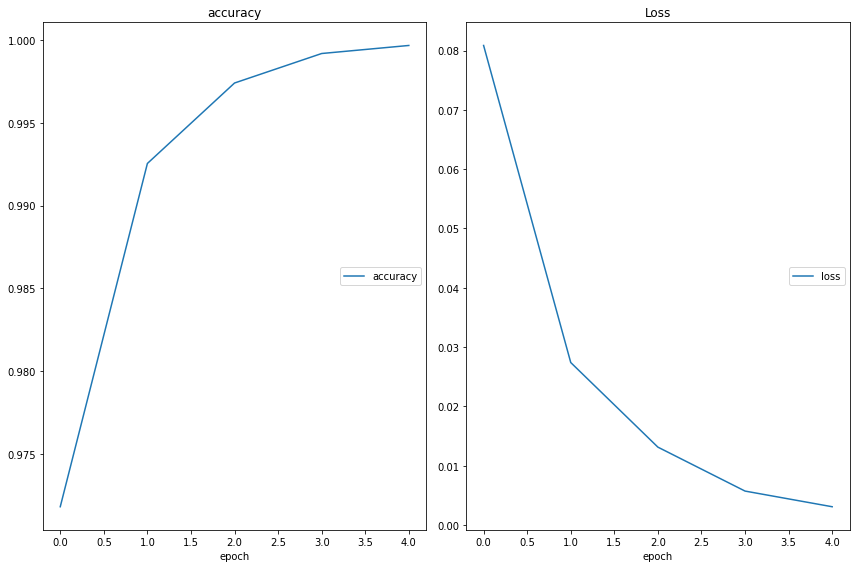

accuracy
	accuracy         	 (min:    0.972, max:    1.000, cur:    1.000)
Loss
	loss             	 (min:    0.003, max:    0.081, cur:    0.003)
62/62 [==============================] - 8s 133ms/step - loss: 0.0031 - accuracy: 0.9997


In [11]:
from livelossplot import PlotLossesKeras
model.fit(x_train,y_train,
         callbacks = [PlotLossesKeras()], batch_size=100,
         epochs = 5)

# Submit on github